## ML Lab AI22

The purpose of this lab is to use the tools you have learned in machine learning to gain knowledge and apply them to various types of problems that you may encounter in the industry. Note that the algorithms and models we build here will be simple, and it is not uncommon in the industry to combine multiple models in solutions. The point of this lab is to gain an understanding of how to approach different types of problems using machine learning.

## Parts

1. Recommender system
2. Disease prediction

## Recommender system
When you watch Youtube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What is behind these recommendations is a type of <a href="https://en.wikipedia.org/wiki/Recommender_system">recommender system</a>.

## 1.0 Warm up
Börja med att kolla på <a href="https://www.youtube.com/watch?v=4Ws0oPH350U">denna youtube-video</a> och följ efter i kod för att skapa ett enkelt recommender system för filmer med hjälp av KNN. Datasetet som används i videon är från movielens small som består av 100,000 ratings på 9000 filmer och 600 användare.


## 1.1 Movielens full - EDA
Nu ska du ladda ned datasetet <a href="https://grouplens.org/datasets/movielens/">ml-latest.zip</a> under sektionen "recommended for education and development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.

a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan.

b) Vilka är de 10 filmerna med flest ratings?

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

d) Gör en plot över årtal och antalet filmer representerade i datasetet. 

e) Gör en plot över antalet ratings mot movieId.

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

In [397]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import numpy as np

movies='../Data/ml-latest/movies.csv'
ratings='../Data/ml-latest/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [398]:
import datetime

now = datetime.datetime.now()
hour = now.hour

if hour >= 23 or hour < 7:
    plt.style.use('dark_background')
    my_time = 'night'
else:
    plt.style.use('default')
    my_time = 'day'

## Most rated movies

In [399]:
def most_rated(n, include_index=False):
    top = df_ratings['movieId'].value_counts().head(n).index
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        print(title['title'].to_string(index=include_index))
        print(f"Total ratings: {df_ratings['movieId'].value_counts().head(n).loc[i]} \n")

most_rated(5, include_index=True)

315    Shawshank Redemption, The (1994)
Total ratings: 97999 

352    Forrest Gump (1994)
Total ratings: 97040 

293    Pulp Fiction (1994)
Total ratings: 92406 

587    Silence of the Lambs, The (1991)
Total ratings: 87899 

2487    Matrix, The (1999)
Total ratings: 84545 



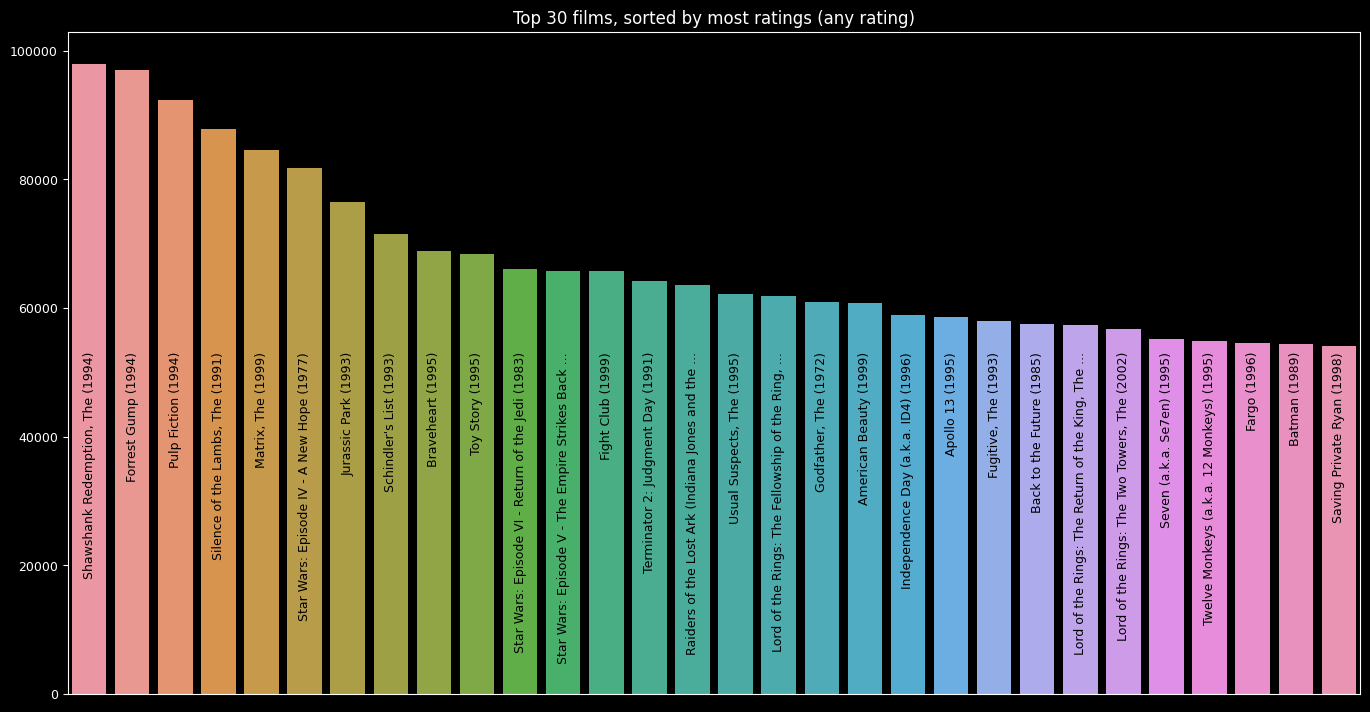

In [400]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

def plot_most_ratings(n):
    top = df_ratings['movieId'].value_counts().head(n).index

    title_name = []
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        title_name.append(title['title'].to_string(index=False))

    #plt.bar(x=title_name, height=df_ratings['movieId'].value_counts().head(10))

    rcParams['figure.figsize'] = 14,7
    sns.barplot(x=title_name, y=df_ratings['movieId'].value_counts().head(n))

    # Testing stuff TODO: how to adjust starting position for text labels on bars ??? now they line up at the end of the last character, should line up at first
    plt.tick_params(labelsize = 9)
    plt.tick_params(length = -250, axis='x')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.title(f'Top {n} films, sorted by most ratings (any rating)')
    plt.ylabel('')

    if my_time == 'night':
        font_color='#000000'
    else:
        font_color='#FFFFFF'
        
    plt.tick_params(axis='x', colors=font_color)

    plt.show()

plot_most_ratings(30)

<div style="display: flex; flex-direction: row; padding: 40px; margin: 20px;">
  <div style="flex: 1;">

<h2>df_ratings.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB
```

  </div>

  <div style="flex: 1;">

<h2>df_movies.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB
````

  </div>

</div>

Memory usage is relatively high for ratings (300 MB), given that it's almost 28 million entries, we could (or should?) reduce this in some way.

Also, strings need formatting, issues with 'The,' ?? Is it only 'The' causing issues - gotta check that out later

ohhh never mind just realized why that *issue* isn't an issue, but a *feature*, because searching for titles you don't search with 'The' for many movies.. i think?? anyway

## Average rating for most rated movies

In [401]:
def average_rating(i, include_title=False):
    muvee = df_ratings.loc[df_ratings['movieId'] == i]
    if include_title:
        print(df_movies[df_movies['movieId'] == i].to_string(index=False))
    return muvee['rating'].mean()

In [402]:
# same function but updated with average rating

def most_rated(n, include_index=False):
    top = df_ratings['movieId'].value_counts().head(n).index
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        print(title['title'].to_string(index=include_index))
        print(f"Total ratings: {df_ratings['movieId'].value_counts().head(n).loc[i]}")
        print(f'Rating average: {average_rating(i):.2f} \n')

most_rated(10, include_index=True)

315    Shawshank Redemption, The (1994)
Total ratings: 97999
Rating average: 4.42 

352    Forrest Gump (1994)
Total ratings: 97040
Rating average: 4.06 

293    Pulp Fiction (1994)
Total ratings: 92406
Rating average: 4.17 

587    Silence of the Lambs, The (1991)
Total ratings: 87899
Rating average: 4.15 

2487    Matrix, The (1999)
Total ratings: 84545
Rating average: 4.15 

257    Star Wars: Episode IV - A New Hope (1977)
Total ratings: 81815
Rating average: 4.12 

476    Jurassic Park (1993)
Total ratings: 76451
Rating average: 3.67 

523    Schindler's List (1993)
Total ratings: 71516
Rating average: 4.26 

108    Braveheart (1995)
Total ratings: 68803
Rating average: 4.01 

0    Toy Story (1995)
Total ratings: 68469
Rating average: 3.89 



## Movies by year

In [403]:
import re
# remove '(year)' from title and add to new col
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)', expand=False) # find 4 digits within parenthesis
df_movies['title'] = df_movies['title'].str.replace(r' \(\d{4}\)', '', regex=True) # remove year from title column

In [404]:
df_movies.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [405]:
df_movies['year'].value_counts()

2015    2312
2014    2297
2016    2219
2013    2187
2012    2019
        ... 
1887       1
1878       1
1874       1
1893       1
1883       1
Name: year, Length: 134, dtype: int64

In [406]:
df_sorted = df_movies.sort_values('year')

# Find the first and last movie
first_movie = df_sorted.iloc[0]
last_movie = df_sorted.iloc[-1]

print(f'{first_movie}\n\n{last_movie}')

movieId              148054
title      Passage de Venus
year                   1874
Name: 37886, dtype: object

movieId             193657
title      A Kiss of Chaos
year                   NaN
Name: 57993, dtype: object


In [407]:
df_movies['year'].isna().sum()

327

Ohhh shit. 327 movies with missing year data.

In [408]:
df_missing_year = df_movies[df_movies['year'].isna()]

df_missing_year

,movieId,title,year
10023,32930,Category 6: Day of Destruction,NaN
10613,40697,Babylon 5,NaN
15719,79607,"Millions Game, The (Das Millionenspiel)",NaN
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",NaN
22651,107434,Diplomatic Immunity (2009– ),NaN
...,...,...,...
57504,192339,The Sign of Three,NaN
57674,192829,Parwaaz Hai Junoon,NaN
57789,193149,¿Qué te juegas?,NaN
57903,193443,Wall,NaN


Some of the titles have missing years because they techinally are mini series, for example *Babylon 5* is a <a href="https://en.wikipedia.org/wiki/Babylon_5">space opera with 100+ episodes</a>, and have a span over many years.

But some movies, like *¿Qué te juegas?* just don't seem to have year within parenthesis, altough <a href="https://es.wikipedia.org/wiki/¿Qué_te_juegas%3F">it was released in 2019</a>

Parwaaz Hai Junoon, movie, 2018
A Kiss of Chaos, movie, 2009

But here's something interesting: *The Sign of Three* seems to be an episode of TV series Sherlock, aired 2014. That's odd. Maybe there are other TV-series episodes as well in the dataset. That might be an issue.

<h3>

The best thing to do, tbh, would be to manually check all 327 rows.

The next best thing would be to scrape another database for year data.

The third best thing would be to discard all 327 rows.

The fourth best thing would be just to carry on and leave it for later.

</h3>


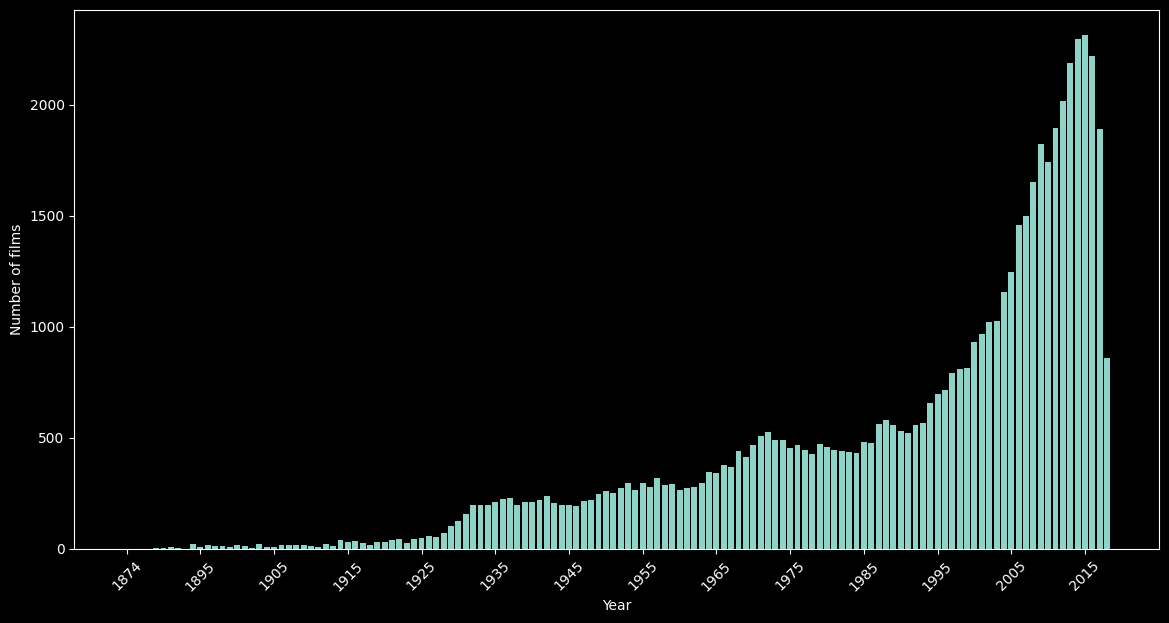

In [409]:
# count the number of movies released each year, regardless of missing year values
year_counts = df_movies.groupby('year')['movieId'].count()
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of films')

n = 10
ax.set_xticks(year_counts.index[::n])
ax.set_xticklabels(year_counts.index[::n], rotation=45)


plt.show()

## User tags

In [410]:
# because of the issue with missing year values I think we will redo the dataframes add the tags
tags='../Data/ml-latest/tags.csv'
df_tags=pd.read_csv(tags, usecols=['movieId', 'tag'])

df_tags.value_counts()

movieId  tag            
260      sci-fi             1050
         Science Fiction     475
         classic             411
         space               410
         space adventure     401
                            ... 
27075    campy                 1
         butler                1
         addams family         1
         Dave Payne            1
193868   romance               1
Length: 481178, dtype: int64

In [411]:
df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
df_movies=df_movies.merge(df_tags, how='outer', on='movieId')

df_movies.head(20)

,movieId,title,tag
0,1,Toy Story (1995),animated
1,1,Toy Story (1995),buddy movie
2,1,Toy Story (1995),Cartoon
3,1,Toy Story (1995),cgi
4,1,Toy Story (1995),comedy
5,1,Toy Story (1995),computer animation
6,1,Toy Story (1995),family
7,1,Toy Story (1995),friendship
8,1,Toy Story (1995),kids
9,1,Toy Story (1995),toy


Hm, I wonder if all tags should be one row for every movie. Well as long as it's not a problem let's keep it as is.

For example:

In [412]:
#What movie do you want to watch?'
user_input = 'romance'

print(f'Ok! Searching for movie with tag: {user_input}')

def find_by_tag(tag, all_results=False, select_random=False):
    match = df_movies.loc[df_movies['tag'] == tag].drop_duplicates().values
    if len(match) == 0:
        print(f'No movies tagged by {tag}, try being more specific.')
    else:
        s = 's'
        if len(match) < 2: s = ''
        print(f'Found {tag} in {len(match)} movie{s}! \n')

    if all_results:
        print(match)

    if select_random:
        n = np.random.randint(len(match))
        print(f'How about watching {match[n][1]}?')

find_by_tag(user_input, all_results=False, select_random=True)


Ok! Searching for movie with tag: romance
Found romance in 1170 movies! 

How about watching Girls About Town (1931)?


In [413]:
find_by_tag('action', all_results=False, select_random=True)

Found action in 910 movies! 

How about watching Shanghai Knights (2003)?


In [414]:
# but there's some issues with the current tags, for example:
find_by_tag('lame')

Found lame in 41 movies! 



I mean, that's extremely subjective, and definitely not a a genre. So the tags need some cleaning.
Just for giggles, let's see whats in there.

In [415]:
find_by_tag('crap'), find_by_tag('shit'), find_by_tag('the best'), find_by_tag('orange', all_results=True)

Found crap in 33 movies! 

Found shit in 16 movies! 

Found the best in 1 movie! 

Found orange in 3 movies! 

[[260 'Star Wars: Episode IV - A New Hope (1977)' 'orange']
 [2888 'Drive Me Crazy (1999)' 'orange']
 [37626 "It's a Gift (1934)" 'orange']]


(None, None, None, None)

In [416]:
# uh, ok yeah, the tags are so dirty
find_by_tag('asd', all_results=True)

Found asd in 2 movies! 

[[593 'Silence of the Lambs, The (1991)' 'asd']
 [1196 'Star Wars: Episode V - The Empire Strikes Back (1980)' 'asd']]


TODO: Clean tags. Maybe filter out everything and just keep some established genres.

So what if people are like, "i want to watch lesser known movies" then they'd perhaps want to watch movies with no ratings, maybe(?). So we can't just drop the movies just because they have no ratings. Instead I think we should remove ratings from the most popular movies.

Like, wouldn't it make sense to first try to find some patterns in users?

## 1.2 Skapa gles matris

Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId" och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset, pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell ```scipy.sparse.csc_matrix()```

Ok, so we back at this. Let's think about it.
Theoretically, we could remove ALL userId:s and just keep the ratings, maybe just the mean rating of every movie. *However* if we do want to recommend movies based on **user similarity**, this can't be done.

Another idea is to remove *some* of the userId:s, or *some* of the ratings.

Yet another idea is to use some kind of slice and dice or chunk method.

Well, one thing is for sure. We don't need 100,000 ratings for any movie.


## 1.3 Recommender system    

Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5 rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.

a) Beskriv med ord hur dit system funkar

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte källhänvisa